In [24]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
import seaborn as sns
import numpy as np
import scipy.stats as stats
from torch.utils.data import DataLoader, Dataset

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Orgnize the data

In [4]:
# standerdization

cols2zscore = iris.columns.drop('species')
iris.loc[:,cols2zscore] = iris[cols2zscore].apply(stats.zscore)

In [5]:
## convert from pandas to tensor

data = torch.tensor(iris[iris.columns[0:4]].values).float()
data[:5]

tensor([[-0.9007,  1.0190, -1.3402, -1.3154],
        [-1.1430, -0.1320, -1.3402, -1.3154],
        [-1.3854,  0.3284, -1.3971, -1.3154],
        [-1.5065,  0.0982, -1.2834, -1.3154],
        [-1.0218,  1.2492, -1.3402, -1.3154]])

In [6]:
# convert species to a one-hot encoding

labels = torch.zeros(len(data),dtype=torch.long)
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

In [7]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [8]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [9]:
train_data = torch.utils.data.TensorDataset(X_train, y_train)
test_data = torch.utils.data.TensorDataset(X_test, y_test)

In [25]:
train_loader = DataLoader(dataset=train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=30, shuffle=True)

## Model and training

In [27]:
import sys
sys.path.append('../utils')
sys.path.append('../models')

In [41]:
import importlib 
import iris_model 
import training
importlib.reload(iris_model)
importlib.reload(training)
from iris_model import IrisModel
from training import trainTheM0del

In [42]:
num_epochs = 1000
act_funs = ['relu','tanh']
metrics = ['loss','train acc','test acc']
classes = []

In [43]:
for actFun in act_funs:
    model = IrisModel(hiddenFun=actFun)
    losses, train_accuracy, test_accuracy = trainTheM0del(
        isClassification=True,
        doBN=False,
        model=model,
        train_loader=train_loader,
        test_loader=test_loader,
        num_epochs=num_epochs,
        loss_function= nn.CrossEntropyLoss())
    classes.append({
        'name': actFun,
        'loss': losses,
        'train acc': train_accuracy,
        'test acc': test_accuracy
    })
    

In [44]:
import performance_plots
importlib.reload(performance_plots)
from performance_plots import comparison_plot

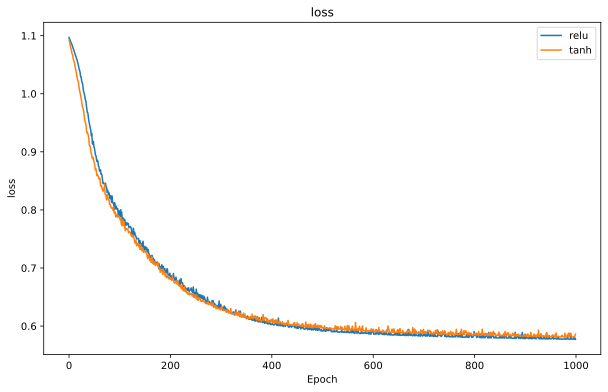

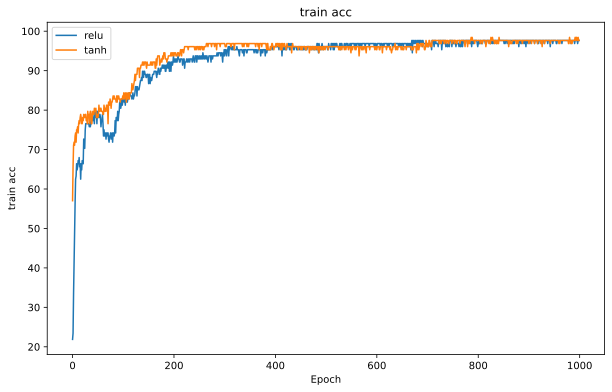

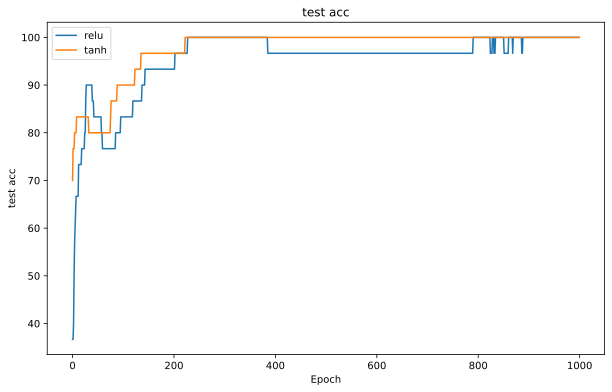

In [45]:
comparison_plot(metrics,classes,smooth_test=False)